<a href="https://colab.research.google.com/github/BlockSpaceVictor/SudokuSolverKeras/blob/master/SudokuSolver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import csv
import random
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

In [0]:
## read data into arrays from csv files
# kaggle data format:
def their_data(filename, size):
	DATA_SIZE = size

	quizzes = np.zeros((DATA_SIZE, 81), np.int32)
	solutions = np.zeros((DATA_SIZE, 81), np.int32)
	for i, line in enumerate(open(filename, 'r').read().splitlines()[1:]):
	    quiz, solution = line.split(",")

	    for j, q_s in enumerate(zip(quiz, solution)):
	        q, s = q_s
	        quizzes[i, j] = q
	        solutions[i, j] = s
	quizzes = quizzes.reshape((-1, 9, 9))
	solutions = solutions.reshape((-1, 9, 9))
	return quizzes, solutions

#my data format 
def my_data(filename, size):
	DATA_SIZE = size

	quizzes = np.zeros((DATA_SIZE, 81), np.int32)
	solutions = np.zeros((DATA_SIZE, 81), np.int32)
	for i, line in enumerate(open(filename, 'r').read().splitlines()[1:]):
	    quiz, solution = line.split(",")
	    quiz = quiz[1:-1]
	    solution = solution[2:-1]

	    for j, q_s in enumerate(zip(quiz, solution)):
	        q, s = q_s
	        quizzes[i, j] = q
	        solutions[i, j] = s
	quizzes = quizzes.reshape((-1, 9, 9))
	solutions = solutions.reshape((-1, 9, 9))
	return quizzes, solutions

In [4]:
## upload sudoku files
#from google.colab import files
#uploaded = files.upload()

Saving mixedSudokus1m.csv to mixedSudokus1m.csv
Saving mixedSudokus2m.csv to mixedSudokus2m.csv
Saving mixedSudokus3m.csv to mixedSudokus3m.csv
Saving mixedSudokus4m.csv to mixedSudokus4m.csv


In [5]:
!ls

sample_data


In [4]:
## Upload Sudoku CSV Files via google Drive: 
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
!ls gdrive/My\ Drive/MachineLearning/Sudokus/

mixedSudokus1m.csv  mixedSudokus3m.csv	mixedSudokus5m.csv
mixedSudokus2m.csv  mixedSudokus4m.csv


In [6]:
# read sudoku files into numpy arrays: 
q1, s1 = my_data("gdrive/My Drive/MachineLearning/Sudokus/mixedSudokus1m.csv", 1000000)
#q2, s2 = my_data("gdrive/My Drive/MachineLearning/Sudokus/mixedSudokus2m.csv", 1000000)
#q3, s3 = my_data("gdrive/My Drive/MachineLearning/Sudokus/mixedSudokus3m.csv", 1000000)
#q4, s4 = my_data("gdrive/My Drive/MachineLearning/Sudokus/mixedSudokus4m.csv", 1000000)
print("Done with Read")

mega_quiz = np.concatenate((q1), axis=0)
mega_sol = np.concatenate((s1), axis=0)

print("Done with Concat")
#Shuffle if necessary
#SEED = 42
#np.random.seed(SEED)
#np.random.shuffle(mega_quiz)
#np.random.seed(SEED)
#np.random.shuffle(mega_sol)

Done with Read
Done with Concat


In [0]:
# Normalize 
def normalize(np_arr):
	np_arr = np.divide(np_arr, 9)
	return np_arr

def reverse_normalize(np_arr):
	np_arr = np.multiply(np_arr, 9)
	return np_arr

In [0]:
# Normalize our arrays
n_qmega = normalize(mega_quiz) 
n_smega = normalize(mega_sol)

In [9]:
#Build Model:
model = tf.keras.Sequential()
model.add(layers.Dense(81, input_shape=(9,9), activation='elu', 
                       bias_initializer='random_uniform'))

model.add(layers.Dense(16, activation='relu', 
                       bias_initializer='random_uniform'))
model.add(layers.Dense(9, activation='linear'))		

opt = keras.optimizers.Adam(lr=0.001)
opt2 = keras.optimizers.SGD(lr=0.001, nesterov=True)

model.compile(optimizer=opt,
              loss='mean_squared_error',
              metrics=['accuracy'])

print(model.summary())

r = model.fit(n_qmega, n_smega, epochs=5, batch_size=500, 
                    validation_split=0.001)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9, 81)             810       
_________________________________________________________________
dense_1 (Dense)              (None, 9, 16)             1312      
_________________________________________________________________
dense_2 (Dense)              (None, 9, 9)              153       
Total params: 2,275
Trainable params: 2,275
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
17982/17982 [==============================] - 33s 2ms/step - loss: 0.0194 - accuracy: 0.7884 - val_loss: 0.0144 - val_accuracy: 0.8067
Epoch 2/5
17982/17982 [==============================] - 32s 2ms/step - loss: 0.0130 - accuracy: 0.8120 - val_loss: 0.0134 - val_accuracy: 0.8047
Epoch 3/5
17982/17982 [==============================] - 32s 2ms/step - loss: 0.0126 - 

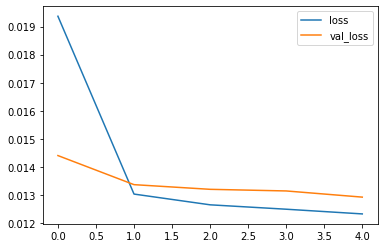

In [10]:
## Plot what is returned by model.fit()

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

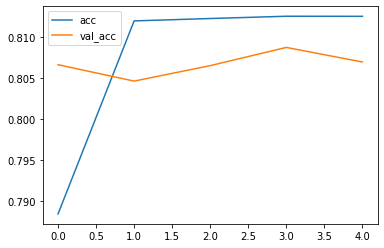

In [11]:
# Plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()